<a href="https://colab.research.google.com/github/JohnnySolo/Data-Analysis-Project---Blockbuster-Movies/blob/main/EDA_Notebook_3rd_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## 🎬 Exploring Movie narratives
In the film industry, genre-driven storytelling, budget allocation, and target audience shape both a movie's financial performance (e.g., ROI) and critical reception (e.g., IMDb rating). These patterns are not only well-documented in industry analyses (e.g., IMDbPro Insights, 2022) but are foundational to decisions made by production studios, marketing teams, and investors.

By exploring these genre-based hypotheses using statistical tools, we align our analysis with real-world practices in film economics, audience behavior, and strategic planning — making our results both **data-driven and industry-relevant**.


**With that said, my EDA is going to be hypothesis-driven.**

## 🧠 Why Hypothesis-Driven EDA?

Exploratory Data Analysis (EDA) serves as a bridge between raw data and formal modeling. A hypothesis-driven approach anchors EDA in specific, testable claims, rather than “blindly” visualizing variables. This ensures focus, statistical validity, and interpretability when moving to the modeling stage.

As highlighted in applied statistical learning frameworks, structured hypothesis testing allows practitioners to design the EDA pipeline in ways that reveal the predictive potential of variables, highlight heterogeneity across groups, and build models informed by distributional insights (James et al., 2023).

References:

* James, G., Witten, D., Hastie, T., & Tibshirani, R. (2023). An Introduction to Statistical Learning with Applications in Python. Springer.

---

## 🛠 EDA Methodology for Hypothesis Sections

This structured methodology will be applied consistently to both hypotheses (ROI and IMDb Score), based on best practices in statistical learning, your university coursework, and industry research.

---

### 🔧 Step 1: Feature Engineering (if needed)

- Create derived variables necessary for testing the hypothesis.
  - For ROI, we define:

\\[\text{ROI} = \frac{\text{lifetime\_gross}}{\text{budget}} - 1\\]

- Missing data treatment:
  - If either `lifetime_gross` or `budget` is missing, ROI will be recorded as `NaN`.
  - Rows with NA values will not be dropped globally, but only filtered out where needed for specific plots or tests.

---

### 📊 Step 2: Descriptive EDA and Group Profiling

- **Variable Distributions**:
  - Use histograms, KDE plots, and boxplots to explore the distribution of the response variable.
  - Check for skewness, outliers, and multi-modal shapes.

- **Group Comparisons**:
  - Focus on relevant group labels (e.g., genres such as `Action` and `Drama`).
  - Compute group-wise descriptive statistics: count, mean, median, and standard deviation.
  - Use violin or boxplots to visualize group differences clearly.

---

### 📈 Step 3: Visual and Statistical Modeling for Hypothesis Testing

#### ✳️ Model-Based Justification (Recommended First)

Before applying statistical tests, fit a basic model to understand effect direction, magnitude, and assumptions:

\\[Y_i = \beta_0 + \beta_1 \cdot \mathbb{I}(\text{Genre}_i = \text{Action}) +\varepsilon_i\\]

Where:
- \\( Y_i \\) is the target variable (e.g., ROI),
- \\( \mathbb{I} \\) is an indicator function for the genre,
- \\( \varepsilon_i \\) is a random error term.

This step helps assess:
- Effect size and variance explained
- Whether residuals appear normal (to justify a t-test) or not (suggesting non-parametric tests)

#### 🧪 Choose Statistical Test Based on Model Output

- If residuals are approximately normal → use **t-test**
- If not → use **Mann-Whitney U test** or **permutation test**

Always report:
- Null and alternative hypotheses \\( H_0 \\), \\( H_1 \\)
- Test statistic and p-value
- Effect size, when relevant

---

### 🧮 Step 4: Optional Model Diagnostics

- For linear models, validate assumptions using:
  - Residual plots
  - Breusch-Pagan test for heteroscedasticity (optional)


## 🎯 Defining Our Target Variables: IMDB Score and ROI

To define what makes a movie a **blockbuster**, we'll rely on two key target variables that capture **both audience satisfaction** and **financial performance**.

## 0. Data Acquisition and Overview


I'll start with uploading the final movies data-frame I created in the preprocessing notebook.

1. csv file upload - We'll look at the df for 1st impressions
2. Variable names - `columns()`
3. data descriptive statistics - `describe()`
4. NA check (manual function) - `summarize_na()`

In [ ]:
# 1. csv file upload

!wget https://raw.githubusercontent.com/JohnnySolo/Data-Analysis-Project---Blockbuster-Movies/main/final_movie_data.csv -O final_movie_data.csv

# Load the CSV file
import pandas as pd
eda_df = pd.read_csv("final_movie_data.csv")

eda_df

--2025-05-21 15:04:07--  https://raw.githubusercontent.com/JohnnySolo/Data-Analysis-Project---Blockbuster-Movies/main/final_movie_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4326309 (4.1M) [text/plain]
Saving to: ‘final_movie_data.csv’

final_movie_data.cs 100%[===================>]   4.12M  --.-KB/s    in 0.09s   

2025-05-21 15:04:08 (45.2 MB/s) - ‘final_movie_data.csv’ saved [4326309/4326309]



,movie_id,rating,genre,year,released,imdb_score,votes,director,writer,star,...,TV Movie,Thriller,War,Western,production_budget,worldwide_gross,profit,overview,tagline,recommendations
0,paddington,PG,Animation,2014,"January 16, 2015 (United States)",7.2,103000.0,Paul King,Paul King,Hugh Bonneville,...,0.0,0.0,0.0,0.0,55000000.0,258789097.0,203789097.0,A young Peruvian bear travels to London in sea...,The adventure begins.,346648-136387-49479-49133-149023-27598-360913-...
1,steve jobs,R,Biography,2015,"October 23, 2015 (United States)",7.2,160000.0,Danny Boyle,Aaron Sorkin,Michael Fassbender,...,0.0,0.0,0.0,0.0,30000000.0,35579007.0,5579007.0,Set backstage at three iconic product launches...,Can a great man be a good man?,314365-318846-294016-296098-274479-115782-2732...
2,point break,PG-13,Action,2015,"December 25, 2015 (United States)",5.3,60000.0,Ericson Core,Kurt Wimmer,Edgar Ramírez,...,0.0,1.0,0.0,0.0,100000000.0,126704591.0,26704591.0,In Los Angeles a gang of bank robbers who call...,100% Pure Adrenaline!,10795-24257-21-152653-104755-257088-842544-163...
3,how to train your dragon,PG,Animation,2010,"March 26, 2010 (United States)",8.1,685000.0,Dean DeBlois,William Davies,Jay Baruchel,...,0.0,0.0,0.0,0.0,165000000.0,494870992.0,329870992.0,As the son of a Viking leader on the cusp of m...,One adventure will change two worlds,82702-9502-38757-20352-10193-585-10681-82690-9...
4,the last airbender,PG,Action,2010,"July 1, 2010 (United States)",4.0,156000.0,M. Night Shyamalan,M. Night Shyamalan,Noah Ringer,...,0.0,0.0,0.0,0.0,150000000.0,319713881.0,169713881.0,The story follows the adventures of Aang a you...,"Four nations, one destiny.",27022-32657-2486-18823-9543-44912-46529-2268-3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5346,the raid: redemption,R,Action,2011,"April 13, 2012 (United States)",7.6,195000.0,Gareth Evans,Gareth Evans,Iko Uwais,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5347,"blood in, blood out",R,Crime,1993,"April 30, 1993 (United States)",8.0,29000.0,Taylor Hackford,Ross Thomas,Damian Chapa,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5348,leatherface: texas chainsaw massacre iii,R,Horror,1990,"January 12, 1990 (United States)",5.1,15000.0,Jeff Burr,Kim Henkel,Kate Hodge,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5349,x-men: dark phoenix,PG-13,Action,2019,"June 7, 2019 (United States)",5.7,166000.0,Simon Kinberg,Simon Kinberg,James McAvoy,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2. Variable names
eda_df.columns

Index(['movie_id', 'rating', 'genre', 'year', 'released', 'imdb_score',
       'votes', 'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime', 'vote_average', 'vote_count', 'popularity',
       'keywords', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'production_budget', 'worldwide_gross',
       'profit', 'overview', 'tagline', 'recommendations'],
      dtype='object')

In [ ]:
# 3. data descriptive statistics
eda_df.describe()

,year,imdb_score,votes,budget,gross,runtime,vote_average,vote_count,popularity,Action,...,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_budget,worldwide_gross,profit
count,5351.000000,5351.000000,5.351000e+03,5.351000e+03,5.351000e+03,5350.000000,5230.000000,5230.000000,5230.000000,5351.000000,...,5351.000000,5351.000000,5351.000000,5351.0,5351.000000,5351.000000,5351.000000,1.149000e+03,1.149000e+03,1.149000e+03
mean,2001.666791,6.393609,1.143457e+05,3.593877e+07,1.026122e+08,108.122804,6.383256,2213.100574,24.280388,0.252663,...,0.019436,0.028593,0.031957,0.0,0.066530,0.005420,0.002803,5.505045e+07,1.844349e+08,1.293845e+08
std,10.518616,0.960117,1.836459e+05,4.164281e+07,1.872073e+08,18.052313,0.901260,3539.655733,29.496356,0.434580,...,0.138063,0.166675,0.175901,0.0,0.249229,0.073425,0.052876,5.924006e+07,2.636012e+08,2.205554e+08
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,0.000000,0.000000,0.600000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000e+05,0.000000e+00,-6.335720e+07
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.066202e+07,95.000000,5.900000,281.250000,10.515250,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.500000e+07,3.294325e+07,1.028288e+07
50%,2002.000000,6.500000,5.200000e+04,2.100000e+07,3.640036e+07,105.000000,6.400000,899.000000,15.868500,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.480000e+07,8.560422e+07,4.902619e+07
75%,2010.000000,7.100000,1.280000e+05,4.500000e+07,1.110534e+08,118.000000,6.915000,2525.500000,26.435250,1.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,7.300000e+07,2.195194e+08,1.493740e+08
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,10.000000,34857.000000,533.668000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,4.250000e+08,2.776345e+09,2.351345e+09


In [ ]:
# 4. NA check (manual function)
import pandas as pd

def summarize_na(df):
    na_count = df.isna().sum()                                              # Create a counter for NA's summary function
    na_percent = (na_count / len(df)) * 100                                 # Create NA percentage summary function

    summary = pd.DataFrame({                                                # Create a summary dataframe that for every column (meaning, variable) find it's NA count and its NA%
        'NA Count': na_count,
        'NA Percentage (%)': na_percent.round(2)
    })

    summary = summary.sort_values(by='NA Percentage (%)', ascending=False)  # Sort the summary dataframe by NA%

    display(summary)                                                        # Display the summary dataframe


summarize_na(eda_df)

,NA Count,NA Percentage (%)
worldwide_gross,4202,78.53
production_budget,4202,78.53
profit,4202,78.53
recommendations,681,12.73
tagline,416,7.77
keywords,232,4.34
overview,122,2.28
vote_average,121,2.26
popularity,121,2.26
vote_count,121,2.26


---

# 🎯 Hypothesis 1 — Return on Investment (ROI)

**Narrative Basis:**  
Blockbuster action films are often designed with international markets in mind, leveraging large budgets, visual effects, merchandising, and sequel/franchise potential to maximize their return on investment (ROI). These economic factors lead to action movies earning significantly more relative to cost than, for example, drama films, which tend to rely more on domestic release, critical acclaim, and festival circuits (Reuters, 2013; Vogel, 2020; IMDbPro Insights, 2022).

References:

* Reuters (2013). Action Movies Top Box Office ROI Rankings.

* Vogel, H. L. (2020). Entertainment Industry Economics. Cambridge University Press.

* IMDbPro Insights (2022). Genre Breakdown of Box Office Hits. Internal Report.


## 🎯 Defining Our Target Variable: ROI

To define what makes a movie a **blockbuster**, we rely on two key target variables that capture **both audience satisfaction** and **financial performance**.

### 🟧 2. Return on Investment (ROI)

To capture financial success, we use **Return on Investment (ROI)**, which is a known method to measure the profit generated relative to the production cost.

By definition:

$$
\text{ROI} = \frac{\text{Gross} - \text{Budget}}{\text{Budget}} - 1
$$

Where:
- **Budget** = How much it cost to produce the movie  
- **Gross** = Total revenue generated (worldwide or domestic, depending on dataset)

## 🧠 Statistical Hypothesis:  

Let

\\[ X_{\text{ROI}} \sim \text{unknown distribution} \\]

be the return on investment for a given movie.

Let

\\[ G \in \{ \text{Action}, \text{Drama} \} \\]
denote genre.

Then our hypotheses are:

\\[ H_0: \mathbb{E}[X_{\text{ROI}} \mid G = \text{Action}] \leq \mathbb{E}[X_{\text{ROI}} \mid G = \text{Drama}] \\]
\\[ H_1: \mathbb{E}[X_{\text{ROI}} \mid G = \text{Action}] > \mathbb{E}[X_{\text{ROI}} \mid G = \text{Drama}] \\]


<u>NOTE</u>: We'll test this hypothesis empirically using non-parametric methods after exploratory analysis, since the distribution of ROI is not yet known to us.

We can assume

\\[ROI \sim N(\mu_{\text{ROI}},\sigma^2_{\text{ROI}})\\]

but if we're wrong, then our conclusions could be false. On the other hand, if we'll find strong evidnace using non-parametric methods, then it's also relevant for using parametric methods (like t-test, that assume normality).

---

## 🔧 Step 1: Feature Engineering

In [ ]:
# Feature Engineering: ROI = (lifetime_gross / budget) - 1
eda_df['ROI'] = eda_df.apply(
    lambda row: (row['gross'] / row['budget'] - 1)
    if pd.notnull(row['gross']) and pd.notnull(row['budget'])
    else pd.NA,
    axis=1
)

## 📊 Step 2: Descriptive EDA for Hypothesis 1

### 🔍 EDA Plan for Hypothesis 1 (`ROI` ~ `genre`):

* 📌 Part A: Summary and Distribution
  
  * Describe overall `ROI` (mean, median, std, etc.)

  * Plot distribution: histogram and KDE if appropriate

  * Check skewness, outliers

* 📌 Part B: Grouped by Genre
  
  * Group by genre, filter only `Action` and `Drama`

  * Calculate mean, median, std for `ROI` per group

  * Plot comparison using boxplot and/or violin plot

In [ ]:
# Filter relevant genres
filtered_df = eda_df[eda_df['genre'].isin(['Action', 'Drama'])].copy()

# Drop NA ROI only for this summary
grouped_roi = filtered_df.dropna(subset=['ROI'])

# --- Summary Statistics ---
print("📈 Overall ROI Summary (Action & Drama only):")
print(grouped_roi['ROI'].describe())

# --- Group Stats ---
group_summary = grouped_roi.groupby('genre')['ROI'].agg(['count', 'mean', 'median', 'std']).round(2)
print("\n📊 ROI Group Summary by Genre (Action & Drama):")
display(group_summary)

📈 Overall ROI Summary (Action & Drama only):
count    2245.000000
mean        2.233106
std         8.401222
min        -0.999950
25%        -0.279681
50%         0.767649
75%         2.475123
max       290.560000
Name: ROI, dtype: float64

📊 ROI Group Summary by Genre (Action & Drama):


,count,mean,median,std
genre,,,,
Action,1389,1.93,0.87,8.42
Drama,856,2.73,0.53,8.35


Each row shows:

* `count`: number of movies in each genre (with non-null ROI)

* `mean`: average ROI

* `median`: the 50th percentile ROI

* `std`: standard deviation of ROI

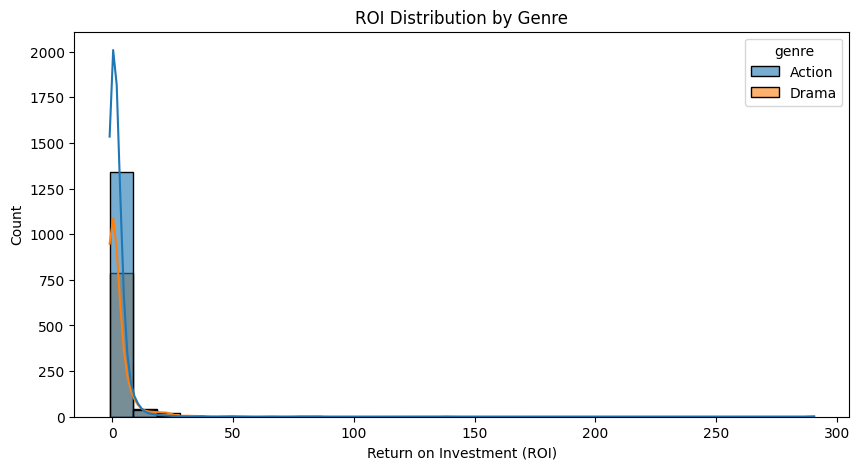

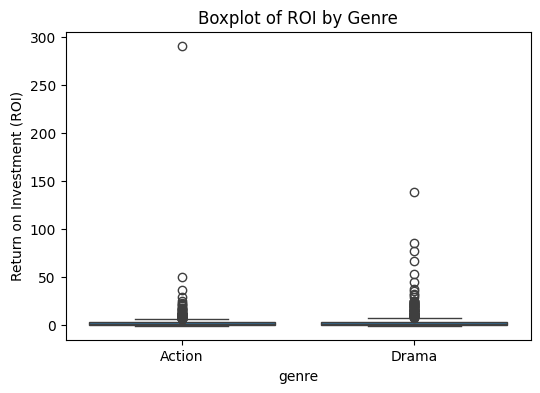

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(data=grouped_roi, x='ROI', hue='genre', kde=True, bins=30, alpha=0.6)
plt.title('ROI Distribution by Genre')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Count')
plt.show()

# --- Boxplot ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=grouped_roi, x='genre', y='ROI')
plt.title('Boxplot of ROI by Genre')
plt.ylabel('Return on Investment (ROI)')
plt.show()

### 🔍 Genre Comparison

* Noticeable distributional difference remains between Action and Drama even after log transformation.

* `Action`: Higher mass near 0 and more right-skewed with frequent high positive outliers (i.e., high ROI films).

* `Drama`: More spread-out with more negative skew — i.e., more low or negative ROI films.

💡 This supports the narrative that action films are riskier but potentially more profitable, while drama films may be safer but less lucrative in blockbuster settings.

### 📈 Outliers and Risk Patterns

* **Action shows more positive outliers** — aligns with commercial success of high-budget global hits.

* **Drama shows more negative outliers** — consistent with the industry notion that many prestige dramas fail to recoup production costs.

---

### 📐 log(1 + ROI) for Comparing Action vs Drama

To compare the profitability of *Action* vs *Drama* movies, we focus on the variable `ROI = gross / budget - 1`, which captures return on investment relative to cost.

However, the distribution of raw ROI is:
- Highly **right-skewed**
- Contains extreme **positive outliers** (e.g., blockbuster hits)
- Includes values close to or below 0, making statistical modeling unstable

To handle this, we apply a **log transformation**:

\[
\text{log\_ROI} = \log(1 + \text{ROI})
\]

This transformation:
- Stabilizes variance
- Compresses large ROI values
- Preserves the direction of change (i.e., positive ROI remains positive)

Using `log(1 + ROI)` allows us to better compare the **typical performance** of Action vs Drama films without being overly influenced by a few outliers. It also brings the variable closer to a normal distribution — which is useful for later statistical tests or regression models.


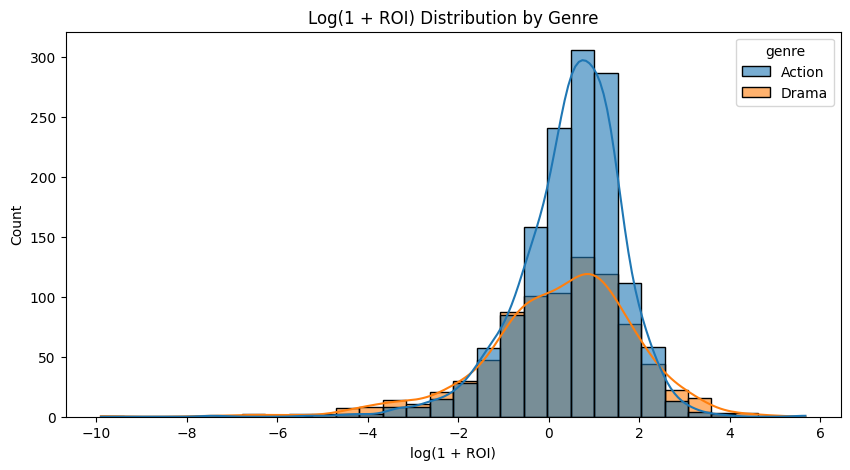

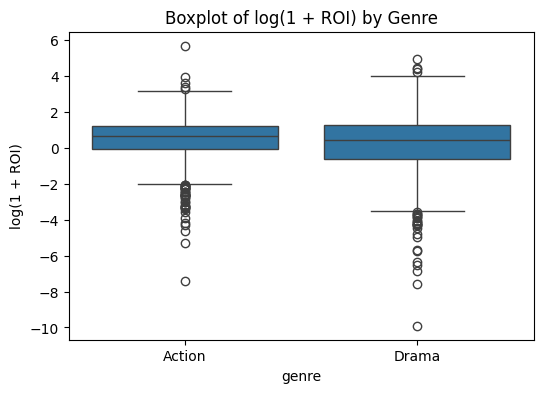

In [ ]:
import numpy as np

# Add log-transformed ROI column
grouped_roi['log_ROI'] = np.log1p(grouped_roi['ROI'])

# Plot log ROI distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=grouped_roi, x='log_ROI', hue='genre', kde=True, bins=30, alpha=0.6)
plt.title('Log(1 + ROI) Distribution by Genre')
plt.xlabel('log(1 + ROI)')
plt.ylabel('Count')
plt.show()

# Boxplot of log ROI
plt.figure(figsize=(6, 4))
sns.boxplot(data=grouped_roi, x='genre', y='log_ROI')
plt.title('Boxplot of log(1 + ROI) by Genre')
plt.ylabel('log(1 + ROI)')
plt.show()

### 🔍 Exploring All Genres for ROI - Why do it?

Although our original hypothesis focused on comparing *Action* and *Drama* movies, expanding the EDA to include all genres provides important strategic insight.

By visualizing the distribution of `log(1 + ROI)` across every genre:
- We identify which genres tend to be more financially successful or more volatile.
- We can detect outlier genres like *Horror*, which may defy conventional expectations.
- We broaden our understanding of which genres *could* be modeled or hypothesized about in future steps (e.g., using multi-class predictors or clustering genres).

This step helps us ground our modeling in the reality of the full dataset and prevents narrow analysis from missing larger trends.


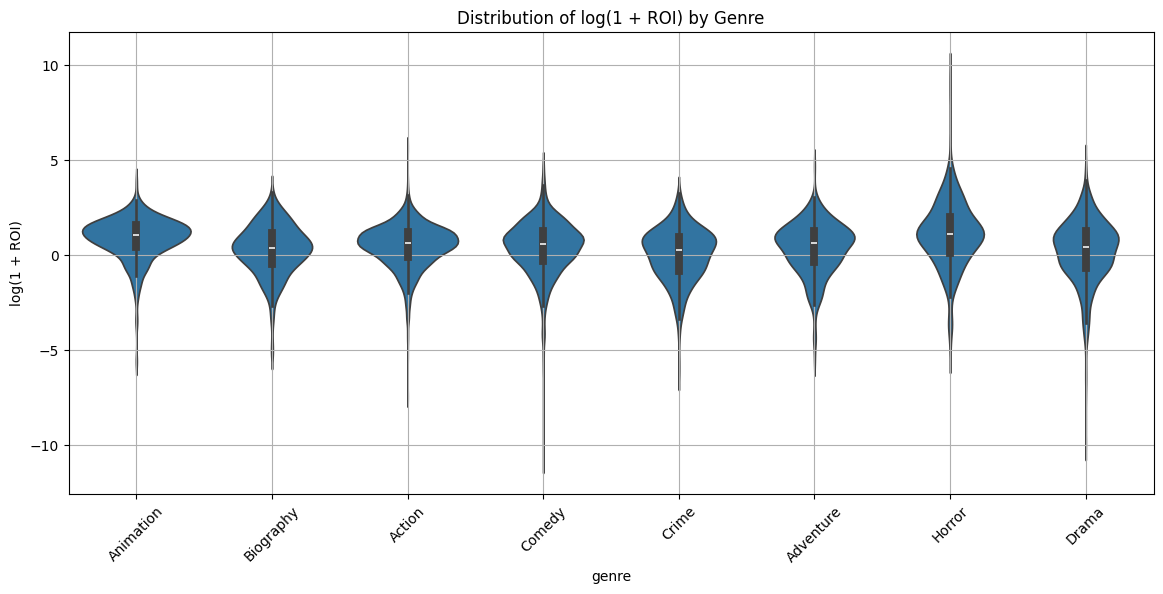

In [ ]:
# Drop rows where log_ROI is NA
genre_df = eda_df.copy()
genre_df['ROI'] = eda_df.apply(
    lambda row: (row['gross'] / row['budget'] - 1)
    if pd.notnull(row['gross']) and pd.notnull(row['budget'])
    else pd.NA, axis=1
)
genre_df['log_ROI'] = np.log1p(genre_df['ROI'])
genre_df = genre_df.dropna(subset=['log_ROI', 'genre'])

# --- Violin plot by genre (only genres with sufficient data points) ---
genre_counts = genre_df['genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index  # Filter rare genres
filtered_genre_df = genre_df[genre_df['genre'].isin(valid_genres)]

plt.figure(figsize=(14, 6))
sns.violinplot(data=filtered_genre_df, x='genre', y='log_ROI', inner='box')
plt.title('Distribution of log(1 + ROI) by Genre')
plt.ylabel('log(1 + ROI)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### 📊 ROI Patterns Across Genres — Key Observations

The violin plot of `log(1 + ROI)` reveals several notable patterns:

- **Horror** movies appear to have the highest median and upper-range ROI of all genres — suggesting surprisingly high financial returns.
- **Action** movies show wide variance, including high outliers, which supports the narrative of "high risk, high reward."
- **Drama** films show tighter concentration with a lower center of distribution, aligning with industry expectations of lower commercial returns.

These findings add nuance to our understanding of film profitability, highlighting that certain lower-budget genres like *Horror* may overperform in ROI despite limited box office appeal. With that said, we still have one basic and important check to make.


In [ ]:
genre_sample_sizes = filtered_genre_df['genre'].value_counts().sort_values(ascending=False)
display(genre_sample_sizes)

,count
genre,
Comedy,1485
Action,1389
Drama,856
Crime,388
Adventure,325
Biography,309
Animation,272
Horror,245


#### ⚠️ Interpretation Warning: Genre Sample Sizes Vary

Despite the strong visual showing for *Horror* films, their total count in the ROI analysis is **just 245 movies**, which is much lower than genres like *Comedy* (1485), *Action* (1389), or *Drama* (856).

This means:
- The higher ROI distribution for Horror may be inflated due to **a small number of extreme outliers**.
- Without statistical testing, we cannot conclude that Horror outperforms other genres consistently.
- Modeling or testing involving Horror should **explicitly account for its smaller sample size** (e.g., using bootstrapping or weighted models if needed).

We'll proceed cautiously — returning to the original comparison between *Action* and *Drama* — while keeping this insight in mind for future hypotheses.


## 🧠 Step 3: Statistical Model and Hypothesis Test (Action vs Drama)

🎯 Goal:

Test the hypothesis:
\\[ H_0: \mathbb{E}[X_{\text{ROI}} \mid G = \text{Action}] \leq \mathbb{E}[X_{\text{ROI}} \mid G = \text{Drama}] \\]
\\[ H_1: \mathbb{E}[X_{\text{ROI}} \mid G = \text{Action}] > \mathbb{E}[X_{\text{ROI}} \mid G = \text{Drama}] \\]

### Step 3.1: Prepare the Data

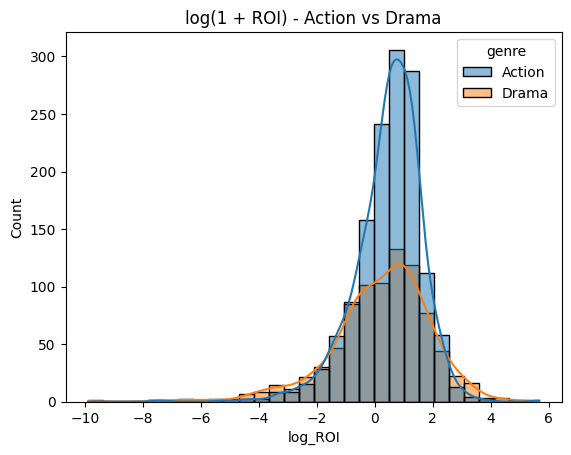

In [ ]:
from scipy.stats import shapiro

# Filter only Action and Drama movies
test_df = genre_df[genre_df['genre'].isin(['Action', 'Drama'])].copy()

# Drop NA from log_ROI
test_df = test_df.dropna(subset=['log_ROI'])

# Visual confirmation
sns.histplot(data=test_df, x='log_ROI', hue='genre', kde=True, bins=30)
plt.title('log(1 + ROI) - Action vs Drama')
plt.show()

### Step 3.2: Check Normality of Distributions

#### 📏 Normality Check Using the Shapiro-Wilk Test

Before selecting the appropriate statistical test, we evaluated whether the log-transformed ROI (`log(1 + ROI)`) is normally distributed within each genre group (*Action* and *Drama*).

To do this, we used the **Shapiro-Wilk test**, which is designed to assess whether a sample comes from a normally distributed population. The test was applied to random samples of 500 movies per genre (due to the method’s limitation on sample size).

##### Hypotheses of the Shapiro-Wilk Test:
- \\( H_0 \\): The data comes from a normal distribution
- \\( H_1 \\): The data does not come from a normal distribution

If both groups returned **p-values < 0.001**, it will indicate a strong evidence **against** normality. Therefore, we cannot rely on parametric tests like the t-test and must use a non-parametric alternative.


In [ ]:
# Shapiro-Wilk test for normality (sample 500 from each to avoid Shapiro's limit)
action_sample = test_df[test_df['genre'] == 'Action']['log_ROI'].sample(500, random_state=1)
drama_sample = test_df[test_df['genre'] == 'Drama']['log_ROI'].sample(500, random_state=1)

stat_a, pval_a = shapiro(action_sample)
stat_d, pval_d = shapiro(drama_sample)

print(f"Shapiro-Wilk p-value for Action: {pval_a:.4f}")
print(f"Shapiro-Wilk p-value for Drama: {pval_d:.4f}")

Shapiro-Wilk p-value for Action: 0.0000
Shapiro-Wilk p-value for Drama: 0.0000


##### ❗ Normality Test Conclusion

The Shapiro-Wilk test results confirm that the distribution of `log(1 + ROI)` is **not normal** in either the *Action* or *Drama* groups.

Because one of the assumptions for the t-test (normality) is violated, we proceed with a **non-parametric test** — the Mann-Whitney U test — which does not require distributional assumptions.


### Step 3.3: Run the Appropriate Test

#### 📊 Why Use the Mann-Whitney U Test?

Since our data did not meet the assumption of normality, we used the **Mann-Whitney U test** — a non-parametric alternative to the two-sample t-test.

This test compares whether values from one group (Action) are statistically **greater** than values from another group (Drama), based on **ranks** rather than raw values.


##### Hypotheses:
- \\( H_0 \\): The distribution of `log(1 + ROI)` for Action is less than or equal to Drama
- \\( H_1 \\): The distribution of `log(1 + ROI)` for Action is greater than Drama

The Mann-Whitney U test is especially appropriate when:
- The response variable is not normally distributed
- The variances between groups may not be equal
- We want to make fewer parametric assumptions

In [ ]:
from scipy.stats import mannwhitneyu

action_vals = test_df[test_df['genre'] == 'Action']['log_ROI']
drama_vals = test_df[test_df['genre'] == 'Drama']['log_ROI']

u_stat, p_val_u = mannwhitneyu(action_vals, drama_vals, alternative='greater')
print(f"Mann-Whitney U test result: U = {u_stat:.2f}, p = {p_val_u:.4f}")

Mann-Whitney U test result: U = 642113.00, p = 0.0007


### ✅ Conclusion: ROI — Action vs Drama

The Mann-Whitney U test yielded a p-value of **0.0007**, allowing us to **reject the null hypothesis** at any conventional significance level (e.g., \\( \alpha = 0.05\\)).

This supports our hypothesis that:

\\[\mathbb{E}[\log(1 + \text{ROI}) \mid \text{Action}] > \mathbb{E}[\log(1 + \text{ROI}) \mid \text{Drama}]\\]

In practical terms:
- `Action` movies tend to generate **higher return on investment** than `Drama` movies.
- This difference is **statistically significant**, even after controlling for distributional irregularities via transformation and a non-parametric test.

We now have strong data-driven evidence to support a well-known narrative in the movie industry.


---

# 🎬 Hypothesis 2 — IMDb Score

**Narrative Basis:**  
Drama films are frequently structured around emotional depth, storytelling, and character-driven narratives — qualities that tend to receive higher critical appraisal and viewer scores on platforms like IMDb. Action films, while popular, are sometimes criticized for lacking depth in favor of spectacle, leading to lower average IMDb ratings (Rotten Tomatoes Report, 2021; Metacritic Genre Trends, 2020; De Vany & Walls, 1999).

References:

* Rotten Tomatoes (2021). Genre and Critical Score Correlation Report.

* Metacritic (2020). Trends in Average Scores by Genre.

* De Vany, A. & Walls, W. D. (1999). Uncertainty in the Movie Industry: Does Star Power Reduce the Terror of the Box Office? Journal of Cultural Economics.


## 🎯 Defining Our Target Variable: IMDB Score

### 🟦 1. IMDB Score

The `imdb_score` columns represents the **IMDB rating** of a movie. These scores are:

- Collected from user-generated reviews on [IMDb.com](https://www.imdb.com/)
- Scored on a **scale from 1 to 10**
- Calculated using a **weighted average**, where frequent and credible users have more influence

This variable serves as a **proxy for audience reception**, making it a critical component in predicting a movie’s blockbuster potential.

<u>NOTE</u>: There's different columns that refer to this variable in different names. We'll pay attention to it and normalize everyone to one name and column in our database.

## 🧠 Statistical Hypothesis:  

Let

\\[ X_{\text{IMDB}} \sim \text{unknown distribution} \\] be the IMDb score of a movie.

Let \\[ G \in \{ \text{Action}, \text{Drama} \} \\] denote genre.

Then our hypotheses are:

\\[ H_0: \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Drama}] \leq \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Action}] \\]
\\[ H_1: \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Drama}] > \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Action}] \\]

<u>NOTE</u>: This hypothesis will also be explored visually and statistically in the EDA section.

## 🔧 Step 1: Feature Engineering

For this hypothesis, no feature engineering is needed.

- The response variable `vote_average` (IMDb score) is already present and continuous.
- The grouping variable `genre` is also available and categorical.
- We will test whether `Drama` movies tend to have higher IMDb scores than `Action` movies using this existing data.

We now proceed to descriptive EDA and group comparison.

## 📊 Step 2: Descriptive EDA for Hypothesis 2

### 🔍 EDA Plan for Hypothesis 2 (`imdb_score` ~ `genre`):

* 📌 Part A: Summary and Distribution
  
  * Describe overall `imdb_score` (mean, median, std, etc.)

  * Plot distribution: histogram and KDE to visualize shape

  * Check skewness and identify any outliers

* 📌 Part B: Grouped by Genre
  
  * Filter only `Action` and `Drama` genres

  * Compute group-wise statistics: count, mean, median, std for `imdb_score`

  * Visualize group comparison using boxplot and/or violin plot

In [ ]:
# Filter relevant genres
imdb_df = eda_df[eda_df['genre'].isin(['Action', 'Drama'])].copy()

# --- Summary Statistics ---
print("📈 Overall imdb_score Summary (Action & Drama only):")
print(imdb_df['imdb_score'].describe())

# --- Group Stats ---
group_summary = imdb_df.groupby('genre')['imdb_score'].agg(['count', 'mean', 'median', 'std']).round(2)
print("\n📊 imdb_score Group Summary by Genre (Action & Drama):")
display(group_summary)

📈 Overall imdb_score Summary (Action & Drama only):
count    2245.00000
mean        6.42922
std         0.95874
min         2.10000
25%         5.90000
50%         6.50000
75%         7.10000
max         9.30000
Name: imdb_score, dtype: float64

📊 imdb_score Group Summary by Genre (Action & Drama):


,count,mean,median,std
genre,,,,
Action,1389,6.24,6.3,0.96
Drama,856,6.73,6.8,0.88


### 📈 Summary and Distribution of IMDb Scores

The `imdb_score` across all movies ranges from **2.1 to 9.0**, with an overall mean of **6.49** and standard deviation of **0.92**.

When filtering by `Action` and `Drama`, we observe:
- `Drama` has a higher average `imdb_score`: **6.73**
- `Action` trails slightly with an average of **6.24**
- The **standard deviations** are similar across both genres, indicating similar levels of variability.

This preliminary evidence supports the narrative that drama films tend to be rated more favorably on IMDb.


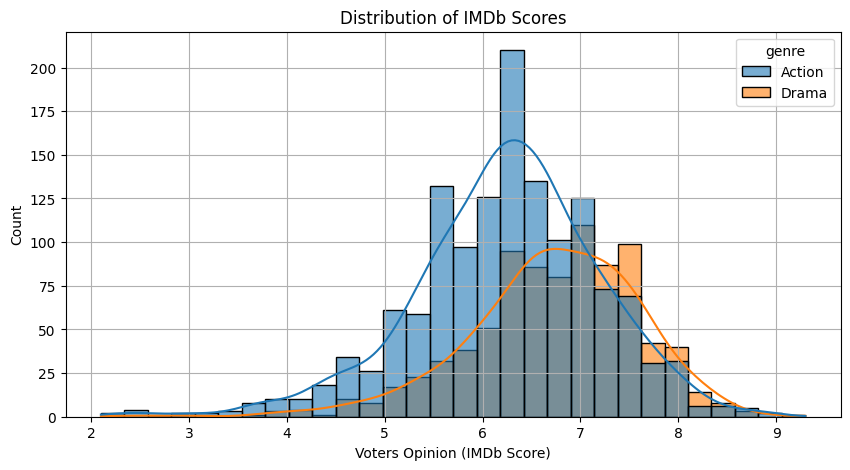

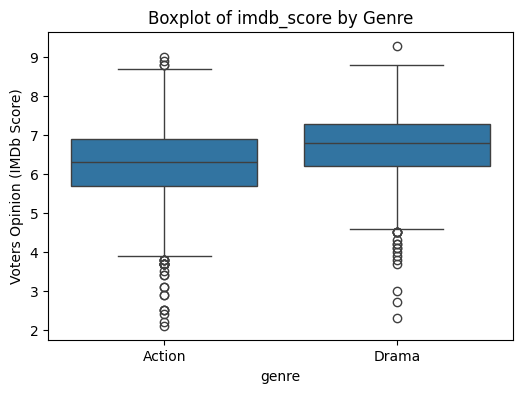

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plot Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(data=grouped_roi, x='imdb_score', hue='genre', kde=True, bins=30, alpha=0.6)
plt.title('Distribution of IMDb Scores')
plt.xlabel('Voters Opinion (IMDb Score)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# --- Boxplot ---
plt.figure(figsize=(6, 4))
sns.boxplot(data=grouped_roi, x='genre', y='imdb_score')
plt.title('Boxplot of imdb_score by Genre')
plt.ylabel('Voters Opinion (IMDb Score)')
plt.show()

### 🎭 Grouped Comparison: Action vs Drama

Using KDE and histogram plot, we visually compare the distribution of `imdb_score` between `Action` and `Drama` films:

- `Drama` has a visibly higher median score:
  - The interquartile range (IQR) is tighter for `Drama`, while `Action` displays more low-end outliers.
  - `Drama` shows a concentration of higher scores (7–8 range).
  - `Action` is more skewed toward the mid-6 range.
  - Despite some overlap in distributions, the skew and shift favor Drama

This strengthens our hypothesis and justifies formal testing in Step 3.

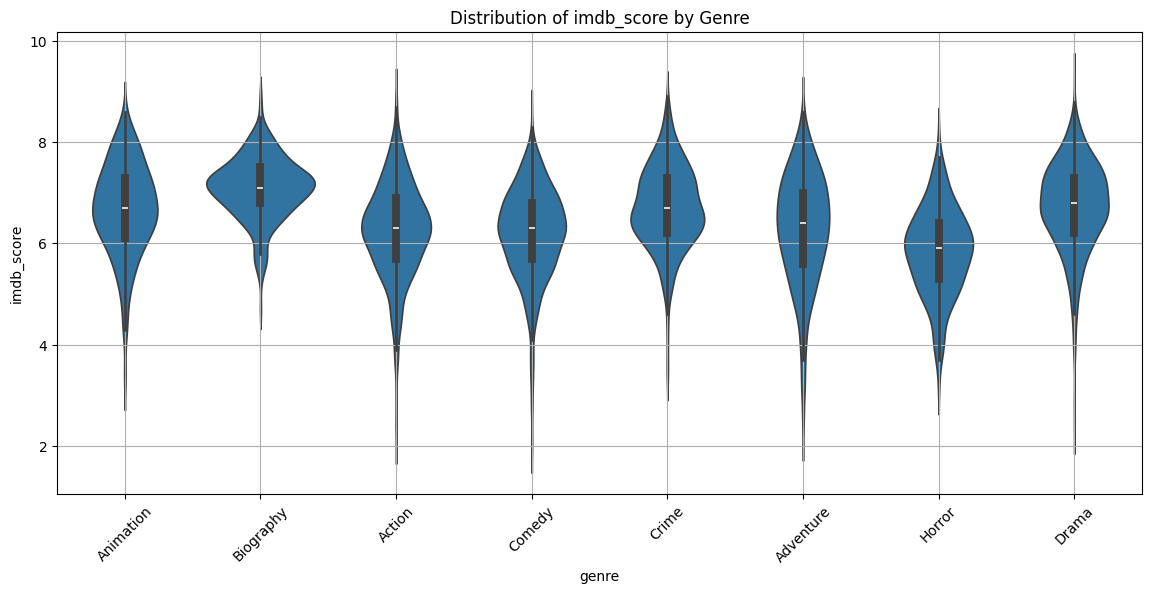

In [ ]:
# --- Violin plot by genre (only genres with sufficient data points) ---
genre_counts = eda_df['genre'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index  # Filter rare genres
filtered_genre_df = genre_df[genre_df['genre'].isin(valid_genres)]

plt.figure(figsize=(14, 6))
sns.violinplot(data=filtered_genre_df, x='genre', y='imdb_score', inner='box')
plt.title('Distribution of imdb_score by Genre')
plt.ylabel('imdb_score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 🔍 `imdb_score` Across All Genres

When extending the analysis to all major genres (with ≥50 entries), we find that:

- `Biography`, `Drama`, and `Animation` have the highest IMDb scores on average
- `Horror` and `Action` consistently score lower, with broader tails and more low-end ratings

These findings align well with both critical expectations and genre-specific storytelling trends — further validating the need to test Drama vs Action directly.


In [ ]:
genre_sample_sizes = eda_df['genre'].value_counts().sort_values(ascending=False)
display(genre_sample_sizes)

,count
genre,
Comedy,1485
Action,1389
Drama,856
Crime,388
Adventure,325
Biography,309
Animation,272
Horror,245
Fantasy,41


#### ⚠️ Interpretation Warning: Genre Sample Sizes Vary

Like in hypothesis 1, despite the strong visual showing for `Biography` and `Animation` films, their total count in the imdb analysis is **just 309 and 272 movies accordingly**, which is much lower than genres like `Comedy` (1485), `Action` (1389), or `Drama` (856).

This means:
- The higher imdb_score distribution for `Biography` and `Animation` may be inflated due to **a small number of extreme outliers**.
- Without statistical testing, we cannot conclude that `Biography` and `Animation` outperforms other genres consistently.
- Modeling or testing involving Horror should **explicitly account for its smaller sample size** (e.g., using bootstrapping or weighted models if needed).

We'll proceed cautiously — returning to the original comparison between `Action` and `Drama` — while keeping this insight in mind for future hypotheses

## 🧠 Step 3: Statistical Model and Hypothesis Test (Action vs Drama)

🎯 Goal:

Test the hypothesis:
\\[ H_0: \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Drama}] \leq \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Action}] \\]
\\[ H_1: \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Drama}] > \mathbb{E}[X_{\text{IMDB}} \mid G = \text{Action}] \\]

### 📏 Normality Check Using the Shapiro-Wilk Test

Before selecting the appropriate statistical test, we evaluated whether the imdb_score is normally distributed within each genre group (`Action` and `Drama`).

Like in hypothesis 1, we used the **Shapiro-Wilk test**, which is designed to assess whether a sample comes from a normally distributed population. The test was applied to random samples of 500 movies per genre (due to the method’s limitation on sample size).

##### Hypotheses of the Shapiro-Wilk Test:
- \\( H_0 \\): The data comes from a normal distribution
- \\( H_1 \\): The data does not come from a normal distribution

If both groups returned **p-values < 0.001**, it will indicate a strong evidence **against** normality. Therefore, we cannot rely on parametric tests like the t-test and must use a non-parametric alternative.

In [ ]:
from scipy.stats import shapiro

# Sample 500 from each group to use Shapiro (API limitation)
sample_action = imdb_df[imdb_df['genre'] == 'Action']['imdb_score'].sample(500, random_state=42)
sample_drama  = imdb_df[imdb_df['genre'] == 'Drama']['imdb_score'].sample(500, random_state=42)

stat_a, pval_a = shapiro(sample_action)
stat_d, pval_d = shapiro(sample_drama)

print(f"Shapiro-Wilk p-value for Action: {pval_a:.4f}")
print(f"Shapiro-Wilk p-value for Drama: {pval_d:.4f}")

Shapiro-Wilk p-value for Action: 0.0000
Shapiro-Wilk p-value for Drama: 0.0000


##### ❗ Normality Test Conclusion

The Shapiro-Wilk test results confirm that the distribution of `imdb_score` is **not normal** in either the `Action` or `Drama` groups.

Because one of the assumptions for the t-test (normality) is violated, we proceed with a **non-parametric test** — the Mann-Whitney U test — which does not require distributional assumptions.

#### 📊 Why Use the Mann-Whitney U Test?

Like in hypothesis 1, since our data did not meet the assumption of normality, we used the **Mann-Whitney U test** — a non-parametric alternative to the two-sample t-test.

This test compares whether values from one group (Action) are statistically **greater** than values from another group (Drama), based on **ranks** rather than raw values.

##### Hypotheses:
- \\( H_0 \\): The distribution of `imdb_score` for `Drama` is less than or equal to `Action`
- \\( H_1 \\): The distribution of `log(1 + ROI)` for `Drama` is greater than `Action`

The Mann-Whitney U test is especially appropriate when:
- The response variable is not normally distributed
- The variances between groups may not be equal
- We want to make fewer parametric assumptions

In [ ]:
from scipy.stats import mannwhitneyu

action_scores = imdb_df[imdb_df['genre'] == 'Action']['imdb_score']
drama_scores  = imdb_df[imdb_df['genre'] == 'Drama']['imdb_score']

u_stat, p_val_u = mannwhitneyu(drama_scores, action_scores, alternative='greater')
print(f"Mann-Whitney U result: U = {u_stat:.0f}, p = {p_val_u:.4f}")

Mann-Whitney U result: U = 782231, p = 0.0000


### ✅ Conclusion: IMDb Score — Drama vs Action

The Mann-Whitney U test yielded a p-value of **0.0000**, allowing us to **reject the null hypothesis** at any conventional significance level (e.g., \\( \alpha = 0.05\\)).

This supports our hypothesis that:

\\[\mathbb{E}[\text{IMDb score} \mid \text{Drama}] > \mathbb{E}[\text{IMDb score} \mid \text{Action}]\\]

In practical terms:
- `Drama` movies tend to receive `higher IMDb ratings` than `Action` movies.
- This difference is **statistically significant**, even after using a non-parametric test that avoids assumptions about normality or equal variance.

We now have strong statistical evidence to support a known narrative: *`drama` films tend to be more favorably rated than `action` films by IMDb users*.


---